In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [2]:
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0

In [3]:
model = keras.Sequential([
    keras.Input(shape=(784,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [5]:
h = model.fit(x=x_train, y=y_train, epochs=20, batch_size=64, validation_split=0.3)

Epoch 1/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8586 - loss: 0.4922 - val_accuracy: 0.9562 - val_loss: 0.1460
Epoch 2/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9656 - loss: 0.1130 - val_accuracy: 0.9679 - val_loss: 0.1116
Epoch 3/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9795 - loss: 0.0673 - val_accuracy: 0.9703 - val_loss: 0.1034
Epoch 4/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9844 - loss: 0.0499 - val_accuracy: 0.9746 - val_loss: 0.0916
Epoch 5/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9905 - loss: 0.0298 - val_accuracy: 0.9722 - val_loss: 0.1013
Epoch 6/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9915 - loss: 0.0257 - val_accuracy: 0.9747 - val_loss: 0.0993
Epoch 7/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9943 - loss: 0.0187 - val_accuracy: 0.9727 - val_loss: 0.1113
Epoch 8/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9927 - loss: 0.0210 - val_accuracy: 0.

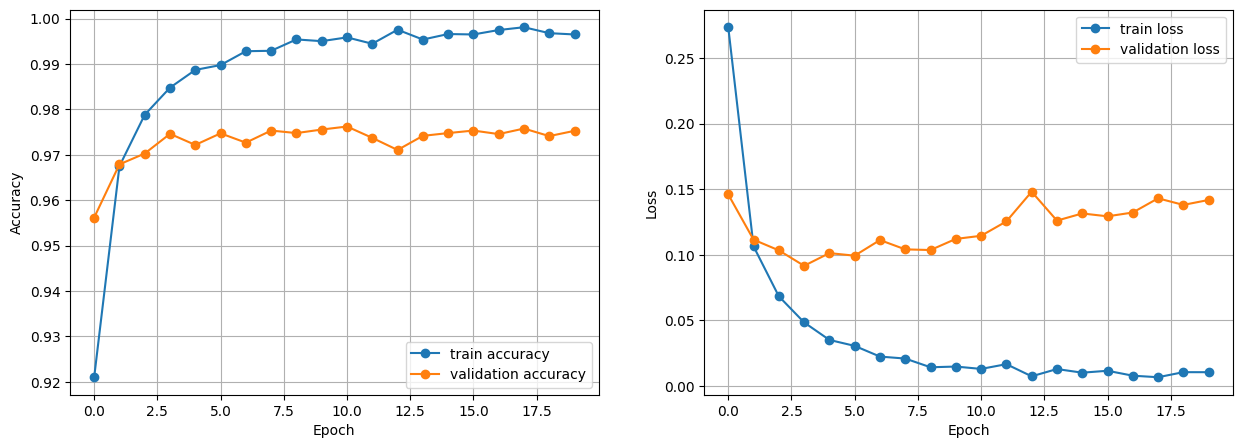

In [6]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9746 - loss: 0.1349

Test accuracy: 0.9782999753952026


In [8]:
model.save('digit_classifier.keras')
print("Model saved as 'digit_classifier.keras'")

Model saved as 'digit_classifier.keras'
